In [28]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# **Data Ingestion**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df_sensor = pd.read_csv("../data/01_raw/sensor.csv")
df_sensor.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [31]:
df_sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

# **Data Cleaning**

In [32]:
df_sensor.drop(columns="Unnamed: 0", inplace=True)

In [33]:
df_sensor.head()

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [34]:
df_sensor["timestamp"] = pd.to_datetime(df_sensor["timestamp"])

In [35]:
df_sensor.drop(columns="sensor_15", inplace=True)

In [36]:
df_sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 53 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   timestamp       220320 non-null  datetime64[ns]
 1   sensor_00       210112 non-null  float64       
 2   sensor_01       219951 non-null  float64       
 3   sensor_02       220301 non-null  float64       
 4   sensor_03       220301 non-null  float64       
 5   sensor_04       220301 non-null  float64       
 6   sensor_05       220301 non-null  float64       
 7   sensor_06       215522 non-null  float64       
 8   sensor_07       214869 non-null  float64       
 9   sensor_08       215213 non-null  float64       
 10  sensor_09       215725 non-null  float64       
 11  sensor_10       220301 non-null  float64       
 12  sensor_11       220301 non-null  float64       
 13  sensor_12       220301 non-null  float64       
 14  sensor_13       220301 non-null  flo

In [37]:
df_sensor.shape

(220320, 53)

In [38]:
df_sensor.isna().sum()

timestamp             0
sensor_00         10208
sensor_01           369
sensor_02            19
sensor_03            19
sensor_04            19
sensor_05            19
sensor_06          4798
sensor_07          5451
sensor_08          5107
sensor_09          4595
sensor_10            19
sensor_11            19
sensor_12            19
sensor_13            19
sensor_14            21
sensor_16            31
sensor_17            46
sensor_18            46
sensor_19            16
sensor_20            16
sensor_21            16
sensor_22            41
sensor_23            16
sensor_24            16
sensor_25            36
sensor_26            20
sensor_27            16
sensor_28            16
sensor_29            72
sensor_30           261
sensor_31            16
sensor_32            68
sensor_33            16
sensor_34            16
sensor_35            16
sensor_36            16
sensor_37            16
sensor_38            27
sensor_39            27
sensor_40            27
sensor_41       

In [39]:
df_sensor.dropna(inplace=True)
df_sensor.shape

(119103, 53)

In [40]:
df_sensor.isna().sum()

timestamp         0
sensor_00         0
sensor_01         0
sensor_02         0
sensor_03         0
sensor_04         0
sensor_05         0
sensor_06         0
sensor_07         0
sensor_08         0
sensor_09         0
sensor_10         0
sensor_11         0
sensor_12         0
sensor_13         0
sensor_14         0
sensor_16         0
sensor_17         0
sensor_18         0
sensor_19         0
sensor_20         0
sensor_21         0
sensor_22         0
sensor_23         0
sensor_24         0
sensor_25         0
sensor_26         0
sensor_27         0
sensor_28         0
sensor_29         0
sensor_30         0
sensor_31         0
sensor_32         0
sensor_33         0
sensor_34         0
sensor_35         0
sensor_36         0
sensor_37         0
sensor_38         0
sensor_39         0
sensor_40         0
sensor_41         0
sensor_42         0
sensor_43         0
sensor_44         0
sensor_45         0
sensor_46         0
sensor_47         0
sensor_48         0
sensor_49         0


In [41]:
df_sensor.duplicated().sum()

np.int64(0)

In [42]:
df_sensor.to_csv("../data/01_raw/sensor_clean.csv")

In [43]:
df_sensor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119103 entries, 0 to 143323
Data columns (total 53 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   timestamp       119103 non-null  datetime64[ns]
 1   sensor_00       119103 non-null  float64       
 2   sensor_01       119103 non-null  float64       
 3   sensor_02       119103 non-null  float64       
 4   sensor_03       119103 non-null  float64       
 5   sensor_04       119103 non-null  float64       
 6   sensor_05       119103 non-null  float64       
 7   sensor_06       119103 non-null  float64       
 8   sensor_07       119103 non-null  float64       
 9   sensor_08       119103 non-null  float64       
 10  sensor_09       119103 non-null  float64       
 11  sensor_10       119103 non-null  float64       
 12  sensor_11       119103 non-null  float64       
 13  sensor_12       119103 non-null  float64       
 14  sensor_13       119103 non-null  float64 

# **Exploratory Data Analysis**

## **Dataset Structure**

In [44]:
print(df_sensor.info())
print(df_sensor.head())
print(df_sensor.describe())
print(df_sensor["machine_status"].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 119103 entries, 0 to 143323
Data columns (total 53 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   timestamp       119103 non-null  datetime64[ns]
 1   sensor_00       119103 non-null  float64       
 2   sensor_01       119103 non-null  float64       
 3   sensor_02       119103 non-null  float64       
 4   sensor_03       119103 non-null  float64       
 5   sensor_04       119103 non-null  float64       
 6   sensor_05       119103 non-null  float64       
 7   sensor_06       119103 non-null  float64       
 8   sensor_07       119103 non-null  float64       
 9   sensor_08       119103 non-null  float64       
 10  sensor_09       119103 non-null  float64       
 11  sensor_10       119103 non-null  float64       
 12  sensor_11       119103 non-null  float64       
 13  sensor_12       119103 non-null  float64       
 14  sensor_13       119103 non-null  float64 

### **analysis of timestamp for checking granularity**

In [45]:
diff = df_sensor["timestamp"].diff().dropna()

print(diff.describe())

count                       119102
mean     0 days 00:01:12.201810213
std      0 days 00:56:17.919308573
min                0 days 00:01:00
25%                0 days 00:01:00
50%                0 days 00:01:00
75%                0 days 00:01:00
max               13 days 07:09:00
Name: timestamp, dtype: object


| Statistik         | Nilai            | Makna                                                                                         |
| ----------------- | ---------------- | --------------------------------------------------------------------------------------------- |
| **mean**          | 00:01:12         | rata-rata antar baris = ~1 menit 12 detik → mayoritas per menit                               |
| **std**           | 00:56:17         | standar deviasi besar banget → ada interval yang jauh lebih panjang (data hilang / gap)       |
| **min**           | 00:01:00         | interval terkecil = 1 menit pas                                                               |
| **25%, 50%, 75%** | semuanya 1 menit | artinya **75% data** punya selisih timestamp = **1 menit** → sangat dominan per menit         |
| **max**           | 13 hari 7 jam    | ada gap waktu yang *gila besarnya* → kemungkinan sistem sempat mati atau data missing panjang |


In [46]:
diff.value_counts().head(10)

timestamp
0 days 00:01:00    119068
0 days 00:02:00        13
0 days 00:03:00         3
0 days 00:06:00         2
0 days 00:09:00         2
0 days 15:17:00         1
0 days 00:31:00         1
0 days 04:00:00         1
0 days 00:07:00         1
0 days 00:36:00         1
Name: count, dtype: int64

In [47]:
diff_seconds = diff.dt.total_seconds()
print(diff_seconds.describe())


count    1.191020e+05
mean     7.220181e+01
std      3.377919e+03
min      6.000000e+01
25%      6.000000e+01
50%      6.000000e+01
75%      6.000000e+01
max      1.148940e+06
Name: timestamp, dtype: float64


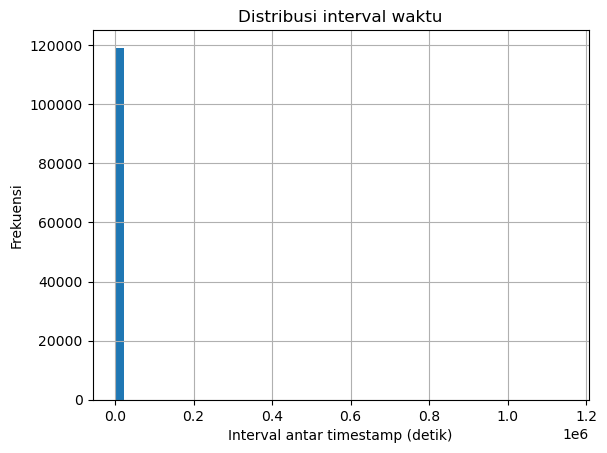

In [48]:
diff_seconds.hist(bins=50)
plt.xlabel("Interval antar timestamp (detik)")
plt.ylabel("Frekuensi")
plt.title("Distribusi interval waktu")
plt.show()

In [49]:
# cek jumlah interval unik
unique_intervals = diff_seconds.unique()
print(f"Unique intervals (in seconds): {unique_intervals[:10]}")


Unique intervals (in seconds): [6.0000e+01 1.8600e+03 5.5020e+04 1.8624e+05 5.4000e+02 1.2000e+02
 1.4400e+04 3.6000e+02 4.2000e+02 2.1600e+03]


### Classification Target

pakai per-sequence classification (many-to-one LSTM)
tapi dengan catatan data harus balance, setelah di cek di path struktur data nya, data untul label tidak balance, report terakhir nya terlampir, normal di atas 90 persen, recovering 2,5 persen, dan error nya 0.0004 persen, sangat jauh jangkauan normal dengan error.

fix yang akan di lakukan kedepan nya :

1. balancing data
2. data recover dan broken mungkin akan di jadikan satu label
3. bisa menggunakan teknik oversampling
4. pakai cross validation

In [50]:
df_sensor['machine_status'] = df_sensor['machine_status'].replace({
    'RECOVERING': 'BROKEN',
})

In [51]:
print(df_sensor["machine_status"].value_counts())

machine_status
NORMAL    116133
BROKEN      2970
Name: count, dtype: int64


## **Mengecek Missing Value & Data Quality**

### **checking missing gap**

Time series sering punya:

* Missing di tengah (karena sensor off)
* Gap waktu tidak konsisten
* Timestamp duplikat

Hal yang dicek:

* Jumlah missing per kolom
* Timestamp out of order
* Interval waktu tidak konsisten

In [52]:
df_sensor = df_sensor.sort_values("timestamp")
df_sensor.head(10)

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL
5,2018-04-01 00:05:00,2.453588,47.09201,53.1684,46.397568,637.6157,78.18568,13.41146,16.16753,15.89265,...,42.70833,38.773150,63.65741,51.79398,38.773150,164.6412,66.55093,241.6088,201.6782,NORMAL
6,2018-04-01 00:06:00,2.455556,47.04861,53.1684,46.397568,633.3333,75.81614,13.43316,16.13136,15.65393,...,43.22916,38.194440,61.92130,51.79398,39.062500,171.8750,67.70834,240.1620,200.2315,NORMAL
7,2018-04-01 00:07:00,2.449653,47.13541,53.1684,46.397568,630.6713,75.77331,13.25231,16.12413,16.19647,...,42.96875,38.194443,59.60648,50.92593,39.351850,178.5301,68.57639,241.3194,201.0995,NORMAL
8,2018-04-01 00:08:00,2.463426,47.09201,53.1684,46.397568,631.9444,74.58916,13.28848,16.13136,15.47309,...,42.18750,38.194440,57.87037,50.63657,39.351850,182.0023,69.44444,243.0556,201.6782,NORMAL
9,2018-04-01 00:09:00,2.445718,47.17882,53.1684,46.397568,641.7823,74.57428,13.38252,16.24711,15.61777,...,41.66666,39.062500,56.42361,50.63657,39.062500,186.6319,69.73380,246.5278,200.8102,NORMAL


In [53]:
# hitung selesih antar timestamp
df_sensor["delta"] = df_sensor["timestamp"].diff()

# cek distribusi jarak waktu nya
df_sensor["delta"].value_counts().head(10)

delta
0 days 00:01:00    119068
0 days 00:02:00        13
0 days 00:03:00         3
0 days 00:06:00         2
0 days 00:09:00         2
0 days 15:17:00         1
0 days 00:31:00         1
0 days 04:00:00         1
0 days 00:07:00         1
0 days 00:36:00         1
Name: count, dtype: int64

In [54]:
df_sensor = df_sensor.set_index('timestamp')

# Reindex ke setiap menit (sesuai resolusi data kamu)
df_sensor = df_sensor.resample('1T').asfreq()

# Cek berapa banyak missing
missing_ratio = df_sensor.isna().mean().mean()
print(f"Missing ratio: {missing_ratio:.2%}")

Missing ratio: 16.90%


/tmp/ipykernel_28897/3229952681.py:4: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_sensor = df_sensor.resample('1T').asfreq()


In [55]:
# Isi nilai sensor yang hilang (pilihan umum: forward fill)
df_sensor = df_sensor.ffill()

In [56]:
# Cek berapa banyak missing
missing_ratio = df_sensor.isna().mean().mean()
print(f"Missing ratio: {missing_ratio:.2%}")

Missing ratio: 0.00%


<Axes: xlabel='timestamp'>

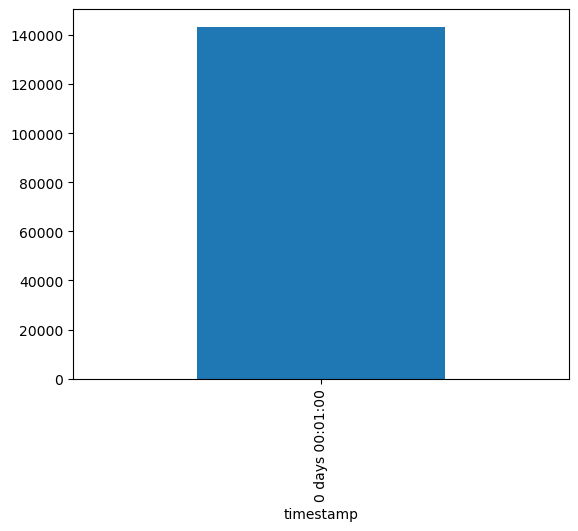

In [57]:
df_sensor.index.to_series().diff().value_counts().plot(kind='bar')


## **Analisis Temporal Global**

Lihat pola keseluruhan:

* **Trend jangka panjang** (naik/turun)
* **Musiman (seasonality)** → harian, mingguan, tahunan
* **Volatilitas** → stabil atau banyak noise

Gunakan line plot atau rolling stats:

### **numerical label checking**

In [58]:
print(df_sensor.columns)


Index(['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04',
       'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
       'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25',
       'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30',
       'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35',
       'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40',
       'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45',
       'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_50',
       'sensor_51', 'machine_status', 'delta'],
      dtype='object')


/home/ayam/miniconda3/envs/time-series-case/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


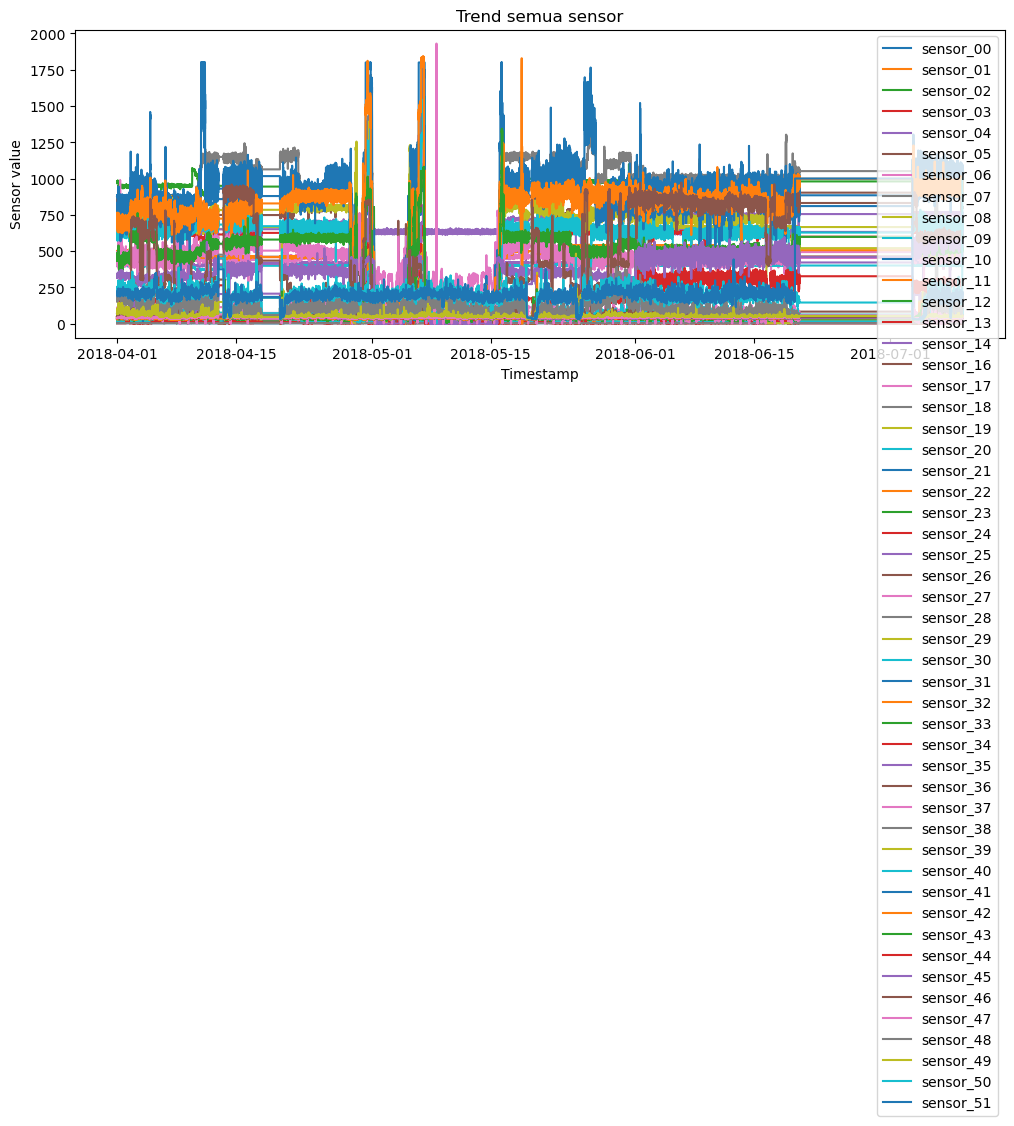

In [59]:
plt.figure(figsize=(12,4))

for col in df_sensor.columns:
    if col.startswith('sensor_'):
        plt.plot(df_sensor.index, df_sensor[col], label=col)

plt.title('Trend semua sensor')
plt.xlabel('Timestamp')
plt.ylabel('Sensor value')
plt.legend()
plt.show()


In [60]:
# volatility checking 
df_sensor[[c for c in df_sensor.columns if c.startswith('sensor_')]].std()

sensor_00      0.513311
sensor_01      2.363225
sensor_02      2.754682
sensor_03      1.805639
sensor_04    106.479673
sensor_05     14.842462
sensor_06      1.631495
sensor_07      1.629142
sensor_08      1.580824
sensor_09      1.565266
sensor_10      9.468003
sensor_11      9.872923
sensor_12      8.428092
sensor_13      4.119585
sensor_14    129.238961
sensor_16    144.022031
sensor_17    150.548491
sensor_18      0.890442
sensor_19    226.270135
sensor_20    115.772072
sensor_21    258.033359
sensor_22    170.795484
sensor_23    308.644108
sensor_24    205.907450
sensor_25    251.312646
sensor_26    268.490134
sensor_27    134.317586
sensor_28    346.398371
sensor_29    265.418693
sensor_30    211.970111
sensor_31    314.964422
sensor_32    280.418014
sensor_33    177.734348
sensor_34     87.966493
sensor_35    131.184784
sensor_36    301.431677
sensor_37     29.009427
sensor_38     10.421460
sensor_39     12.121172
sensor_40     16.109963
sensor_41      7.475276
sensor_42      7

### Penjelasan
---

#### **Jenis pola (trend vs seasonal)**

Dari grafik itu:

* **Tidak terlihat ada arah kenaikan atau penurunan jangka panjang** yang jelas (tidak stabil naik/turun seiring waktu).
  → jadi **bukan trend kuat**.
* Polanya lebih seperti **fluktuasi berulang-ulang** (naik-turun di periode tertentu, mungkin harian atau mingguan).

Jadi ini **lebih mirip pola *seasonal* atau periodik** — alias ada pengulangan pola nilai sensor pada rentang waktu tertentu.
Cuma karena semua sensor digabung dalam satu plot, agak susah lihat periodenya jelas. Kalau kamu plot **satu sensor per grafik**, mungkin bakal kelihatan pola mingguan/harian lebih jelas.

---

#### **Volatilitas (volatility)**

Volatilitas = seberapa besar **variasi** atau **perubahan nilai** dari waktu ke waktu.
Dari plot:

* Ada beberapa sensor yang **loncat-loncat ekstrem** (spike tajam, misal sensor_00 atau sensor_03).
* Tapi sebagian besar sensor berfluktuasi di range sempit (lebih stabil).

Artinya → **volatilitasnya tinggi**, tapi **tidak seragam antar sensor**.

---


### **categorical label checking**

#### **time-based frequency plot**

<Axes: xlabel='dayofweek'>

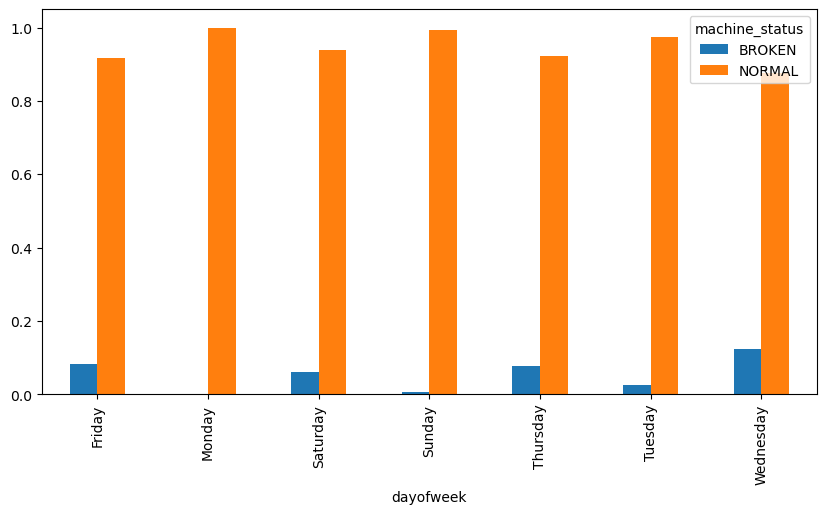

In [61]:
# pastikan index-nya memang datetime
df_sensor.index = pd.to_datetime(df_sensor.index)

# ambil nama hari dari index
df_sensor['dayofweek'] = df_sensor.index.day_name()

# hitung pola mingguan untuk setiap kategori/status
weekly_pattern = df_sensor.groupby(['dayofweek', 'machine_status']).size().unstack(fill_value=0)

# ubah ke proporsi biar perbandingan keliatan
(weekly_pattern.T / weekly_pattern.sum(axis=1)).T.plot(kind='bar', figsize=(10,5))


/tmp/ipykernel_28897/2294833659.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_pattern = df_sensor.groupby([pd.Grouper(freq='M'), 'machine_status']).size().unstack(fill_value=0)


<Axes: xlabel='timestamp'>

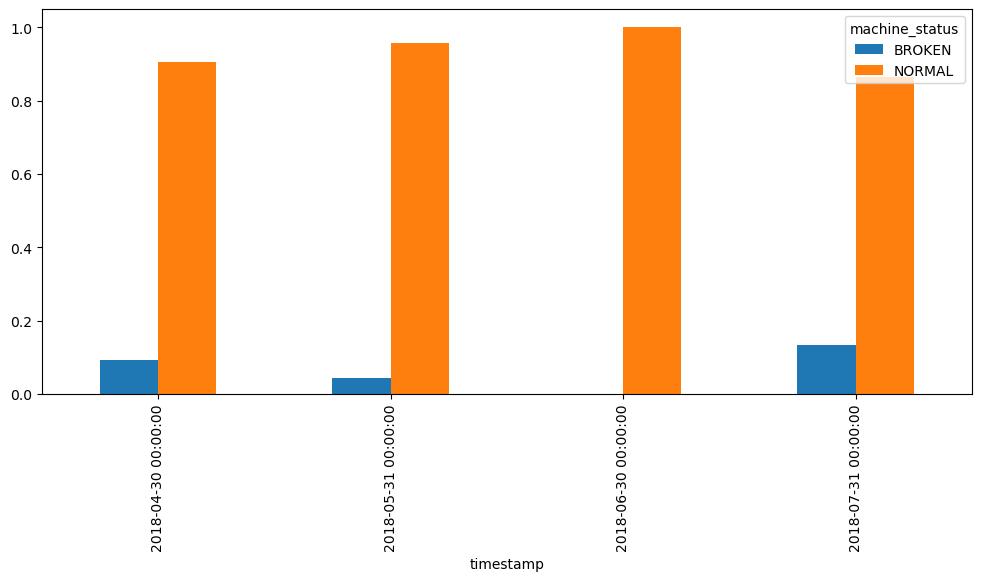

In [63]:
monthly_pattern = df_sensor.groupby([pd.Grouper(freq='M'), 'machine_status']).size().unstack(fill_value=0)
(monthly_pattern.T / monthly_pattern.sum(axis=1)).T.plot(kind='bar', figsize=(12,5))


In [64]:
(df_sensor['machine_status'] != df_sensor['machine_status'].shift()).mean()


np.float64(9.070358069827803e-05)

In [65]:
from sklearn.metrics import confusion_matrix
import pandas as pd

pd.crosstab(df_sensor['machine_status'], df_sensor['machine_status'].shift(-1), normalize='index')


machine_status,BROKEN,NORMAL
machine_status,,
BROKEN,0.999213,0.000787
NORMAL,0.000044,0.999956
